# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

output_data_file = "cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


In [3]:
# Url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

query_url

'http://api.openweathermap.org/data/2.5/weather?appid=e0c8786a7633f741c22f6ce30a5db990&units=imperial&q='

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# List for holding reponse information
lat = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lon = []
date = []
country = []
cloudiness = []


# Loop through the list of cities and request for data on each
print("Beginning Data Retrieval")
print("--------------------------------------------")
count = 0
set = 1
for idx, city in enumerate(cities):
    count = count + 1
    # To avoid api call rate limits, get city weather data for 50 cities,
    # then sleep for 5 seconds, and then continue with next 50 cities and so on...
    if count == 51:
        count = 1
        set = set + 1
        time.sleep(5)
    print(f"Processing Record {count} of Set {set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City not found. Skipping...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
print("------------------------------------------------")
print("Data Retrieval Complete")
print("------------------------------------------------")

Beginning Data Retrieval
--------------------------------------------
Processing Record 1 of Set 1 | saint-augustin
Processing Record 2 of Set 1 | rio gallegos
Processing Record 3 of Set 1 | eirunepe
Processing Record 4 of Set 1 | wewak
Processing Record 5 of Set 1 | saiha
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | khatanga
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | dicabisagan
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | morden
Processing Record 15 of Set 1 | cesvaine
Processing Record 16 of Set 1 | klaksvik
Processing Record 17 of Set 1 | skjervoy
Processing Record 18 of Set 1 | chuy
Processing Record 19 of Set 1 | north valley
Processing Record 20 of Set 1 | aklavik
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | tarudant
City not found. Skippin

Processing Record 41 of Set 4 | ayan
Processing Record 42 of Set 4 | luau
Processing Record 43 of Set 4 | havre-saint-pierre
Processing Record 44 of Set 4 | labuhan
Processing Record 45 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 46 of Set 4 | korla
Processing Record 47 of Set 4 | marrakesh
Processing Record 48 of Set 4 | nicoya
Processing Record 49 of Set 4 | pacific grove
Processing Record 50 of Set 4 | blackwater
Processing Record 1 of Set 5 | bengkulu
Processing Record 2 of Set 5 | bilma
Processing Record 3 of Set 5 | cidreira
Processing Record 4 of Set 5 | laje
Processing Record 5 of Set 5 | kudahuvadhoo
Processing Record 6 of Set 5 | haimen
Processing Record 7 of Set 5 | dombarovskiy
Processing Record 8 of Set 5 | ust-omchug
Processing Record 9 of Set 5 | constitucion
Processing Record 10 of Set 5 | xichang
Processing Record 11 of Set 5 | pau brasil
Processing Record 12 of Set 5 | gamba
Processing Record 13 of Set 5 | qasigiannguit
Processing Record 14 of Set

Processing Record 33 of Set 8 | okahandja
Processing Record 34 of Set 8 | priyutnoye
Processing Record 35 of Set 8 | yining
Processing Record 36 of Set 8 | belize
Processing Record 37 of Set 8 | conceicao do castelo
Processing Record 38 of Set 8 | muromtsevo
Processing Record 39 of Set 8 | bubaque
Processing Record 40 of Set 8 | byron bay
Processing Record 41 of Set 8 | abashiri
Processing Record 42 of Set 8 | marcona
City not found. Skipping...
Processing Record 43 of Set 8 | coruripe
Processing Record 44 of Set 8 | popondetta
Processing Record 45 of Set 8 | hofn
Processing Record 46 of Set 8 | kavieng
Processing Record 47 of Set 8 | tarabuco
Processing Record 48 of Set 8 | tazovskiy
Processing Record 49 of Set 8 | malinovoye ozero
Processing Record 50 of Set 8 | inongo
Processing Record 1 of Set 9 | cayenne
Processing Record 2 of Set 9 | muros
Processing Record 3 of Set 9 | san andres
Processing Record 4 of Set 9 | egvekinot
Processing Record 5 of Set 9 | ust-ilimsk
Processing Record

Processing Record 16 of Set 12 | burica
City not found. Skipping...
Processing Record 17 of Set 12 | lukovetskiy
Processing Record 18 of Set 12 | san jose
Processing Record 19 of Set 12 | namibe
Processing Record 20 of Set 12 | maputo
Processing Record 21 of Set 12 | porto walter
Processing Record 22 of Set 12 | kiyasovo
Processing Record 23 of Set 12 | kahului
Processing Record 24 of Set 12 | liwale
Processing Record 25 of Set 12 | doha
Processing Record 26 of Set 12 | sile
Processing Record 27 of Set 12 | buraydah
Processing Record 28 of Set 12 | ranong
Processing Record 29 of Set 12 | leninskoye
Processing Record 30 of Set 12 | tomakomai
Processing Record 31 of Set 12 | coro
Processing Record 32 of Set 12 | itacoatiara
Processing Record 33 of Set 12 | port lincoln
Processing Record 34 of Set 12 | roma
Processing Record 35 of Set 12 | miranorte
City not found. Skipping...
Processing Record 36 of Set 12 | dakar
Processing Record 37 of Set 12 | smidovich
Processing Record 38 of Set 12 

In [7]:
len(lat)
len(temp)

595

In [9]:
city_df = pd.DataFrame({
    "City": cities,
    "Lat": lat,
    "lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
})

# Drop any cities that were skipped because they could not be found using the OpenWeatherMap API.
city_df = city_df.dropna(how="any")
print(city_df.count())

City          552
Lat           552
lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64


In [10]:
city_df.head()

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint-augustin,51.2260,-58.6502,5.94,71.0,19.0,18.37,CA,1.672872e+09
1,rio gallegos,-51.6226,-69.2181,57.25,62.0,100.0,13.80,AR,1.672872e+09
2,eirunepe,-6.6603,-69.8736,74.91,97.0,100.0,2.59,BR,1.672872e+09
3,wewak,-3.5534,143.6268,82.04,75.0,91.0,4.83,PG,1.672872e+09
4,saiha,22.4833,92.9667,51.49,73.0,1.0,4.03,IN,1.672872e+09


In [11]:
city_df.to_csv("city_data.csv", index=False)

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

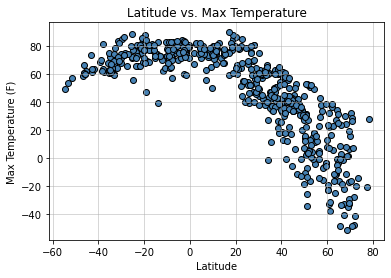

In [13]:
date_of_analysis = datetime.date(datetime.now())
# Create a scatter plot for latitude vs max temperature.
x_values = city_df['Lat']
y_values = city_df['Max Temp']
plt.scatter(x_values, y_values, facecolor = "steelblue", edgecolor = "black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"Latitude vs. Max Temperature")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("Latitude_vs_Temperature.png", bbox_inches="tight")
plt.show()

#### Latitude Vs. Humidity

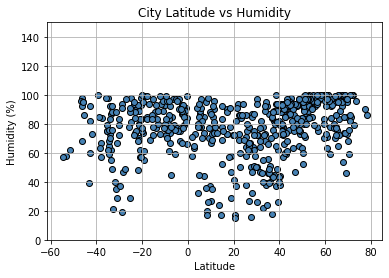

In [14]:
x_values = city_df['Lat']
y_values = city_df['Humidity']
plt.scatter(x_values, y_values, facecolor = "steelblue", edgecolor = "black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity')
plt.ylim(0, 150)
plt.grid()
plt.savefig("Latitude_vs_Humidity.png", bbox_inches="tight")
plt.show()

#### Latitude Vs. Cloudiness

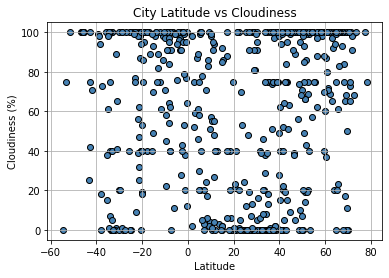

In [15]:
# Create a scatter plot for latitude vs cloudiness.
x_values = city_df['Lat']
y_values = city_df['Cloudiness']
plt.scatter(x_values, y_values, facecolor = "steelblue", edgecolor = "black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness')
plt.grid()
plt.savefig("Latitude_vs_Cloudiness.png", bbox_inches="tight")
plt.show()

#### Latitude vs. Wind Speed Plot

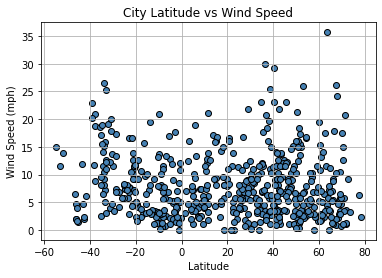

In [16]:
x_values = city_df['Lat']
y_values = city_df['Wind Speed']
plt.scatter(x_values, y_values,facecolor = "steelblue", edgecolor = "black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed')
plt.grid()
plt.savefig("Latitude_vs_Wind.png", bbox_inches="tight")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim is not None:
        plt.ylim(0, ylim)
    today = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {today}")
    plt.annotate(line_eq,line_placement,fontsize=15,color="red")
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.savefig(f"{hemisphere}_{x_label}_vs_{y_label}.png", bbox_inches="tight")
    return plt.plot(x_values,regress_values,"r-")

In [20]:
northern_hemi = city_df.loc[city_df["Lat"] >= 0]
southern_hemi = city_df.loc[city_df["Lat"] < 0]

###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7014288229142805
The correlation between both factors is -0.84


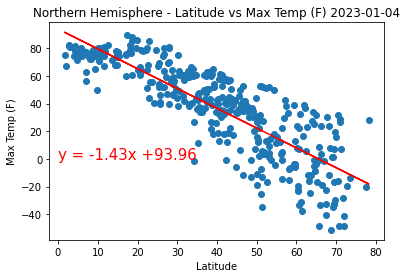

In [21]:
x_values = northern_hemi['Lat']
y_values = northern_hemi['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Max Temp (F)", "Northern",(0, 0))

In [22]:
print(f"The result from the r-squared, there is a moderate, negative correlation between temp and latitude Northern Hemispshere cities.")

The result from the r-squared, there is a moderate, negative correlation between temp and latitude Northern Hemispshere cities.


The r-squared is: 0.234253745275326
The correlation between both factors is 0.48


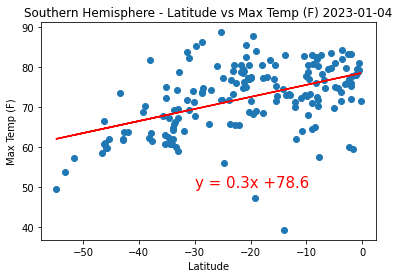

In [23]:
x_values = southern_hemi['Lat']
y_values = southern_hemi['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Max Temp (F)", "Southern",(-30, 50))

In [24]:
print(f"The result from the r-quared, there is a very weak positive correlation between temp and latitude Southern Hemisphere cities.")

The result from the r-quared, there is a very weak positive correlation between temp and latitude Southern Hemisphere cities.


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.15199294213502967
The correlation between both factors is 0.39


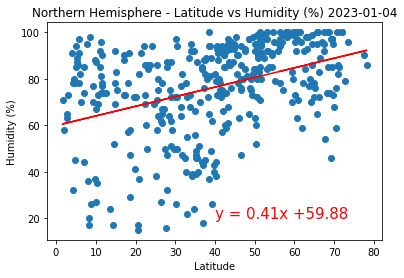

In [25]:
x_values = northern_hemi['Lat']
y_values = northern_hemi['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(40, 20))

In [26]:
print(f"From the r-squared, there is a very weak positive correlation between humidity and latitude in the Northern Hemisphere cities.")

From the r-squared, there is a very weak positive correlation between humidity and latitude in the Northern Hemisphere cities.


The r-squared is: 0.15199294213502967
The correlation between both factors is 0.39


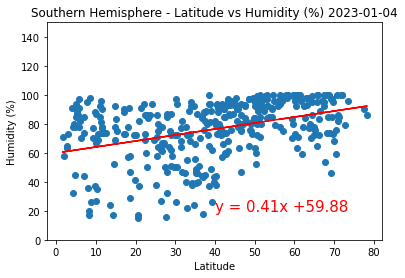

In [27]:
x_values1 = southern_hemi['Lat']
y_values1 = southern_hemi['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(40, 20), 150)

In [28]:
print(f"From the r-squared, there is a very weak positive correlation between humidity and latitude in the Southern Hemisphere cities.")

From the r-squared, there is a very weak positive correlation between humidity and latitude in the Southern Hemisphere cities.


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.11676100865956221
The correlation between both factors is 0.34


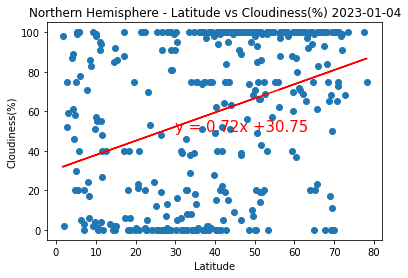

In [29]:
x_values = northern_hemi['Lat']
y_values = northern_hemi['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Northern",(30, 50))

In [30]:
print(f"From the r-quared, there is a very weak correlation between cloudiness and Latitude in the Northern Hemisphere cities.")

From the r-quared, there is a very weak correlation between cloudiness and Latitude in the Northern Hemisphere cities.


The r-squared is: 0.02269348456263308
The correlation between both factors is 0.15


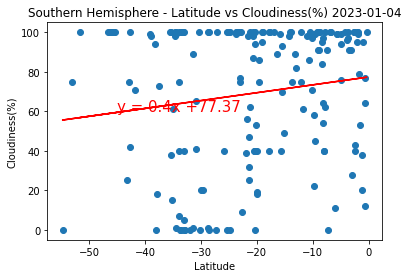

In [31]:
x_values = southern_hemi['Lat']
y_values = southern_hemi['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))

In [32]:
print(f"From the r-quared, there is a very weak positive correlation between cloudiness and Latitude in the Southern Hemisphere cities.")

From the r-quared, there is a very weak positive correlation between cloudiness and Latitude in the Southern Hemisphere cities.


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 2.2763256951028055e-06
The correlation between both factors is -0.0


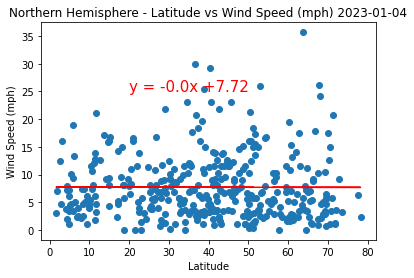

In [33]:
x_values = northern_hemi['Lat']
y_values = northern_hemi['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))

In [34]:
print(f"From the r-quared, there is a very weak correlation between windspeed and Latitude in the Northern Hemisphere cities.")

From the r-quared, there is a very weak correlation between windspeed and Latitude in the Northern Hemisphere cities.


The r-squared is: 0.0995357722031043
The correlation between both factors is -0.32


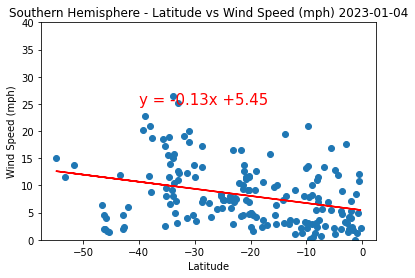

In [35]:
x_values = southern_hemi['Lat']
y_values = southern_hemi['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25), ylim=40)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [36]:
print(f"From the r-quared, there is a very weak negative correlation between windspeed and Latitude in the Southern Hemisphere cities.")

From the r-quared, there is a very weak negative correlation between windspeed and Latitude in the Southern Hemisphere cities.
